# Array Algebra

<center><img width="400" src="https://quivergeometry.net/indaba/07ozagz3u8q1h_1g9xeqr8o55fk_0800_1012.png"></center>

**Authors:** Taliesin Beynon

**Introduction:** Array algebra is the theory and practice of manipulating and computing with arrays of numbers. The
underlying ideas are quite simple and intuitive, once you're used to them! This practical will cover some of the core
concepts, and focus on visualizing the operations to make them easier to understand.

**Topics:** numpy, jax, array processing

**Learning objectives:**

* Understand how arrays of number of various sizes and shapes can represent data from the real world
* Manipulate these arrays to perform useful computations
* Understand how shapes of arrays are transformed by these operations
* Detect bugs in existing code
* Choose the right transformations to accomplish a given task.

# Installation and imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell. 
#@title Install and import required packages. (Run Cell)
import os 
import matplotlib.pyplot as plt
import numpy as np

# What are arrays?

To get started we'll cover some very basic ideas in array algebra.

A **numeric array** is a data structure containing **numbers**. These numbers are *organized* in a system, grid-like
way. We can classify arrays by *how* they organize these numbers -- in particular the shapes of grids they use. But
first, let's introduce some terminology.

Each **number** in an array lives in a **cell**. The **value** of the cell is the number it contains. The **position**
of the cell is where the cell is located within the array.

We can make a useful analogy between an *array of numbers* and a *neighborhood of houses*. The *houses* are organized
into *streets,* and each house contains a certain number of *people*.

### A single house

The simplest kind of neighborhood only has one house in it! This house doesn't need to have an address, because we don't
need to distinguish it from any other houses. The postman will clearly know which house to go to *without* an address!

On the left we show this **neighborhood**, which has only one house that contains 3 people. On the right we show the
**array** it corresponds to in our analogy.

<center><img width="212" src="https://quivergeometry.net/indaba/0l9gsvjixw9yf_057dpz2pvcjhw_0424_0116.png"></center>

This kind of array is so simple that most people don't usually call it an array, but is technically a **0-array**! More
frequently it is known as a **scalar**.

Here is how we can create such a scalar in numpy. Run this code and see what the **shape** of this array is, we'll talk
more about this later!

In [ ]:
scalar = np.array(3)
scalar.shape

### A single road

Now let's consider a neighborhood with just one street, and 3 houses on it.

<center><img width="460" src="https://quivergeometry.net/indaba/1ocmn1h4gida7_06zmoryml7n7c_0920_0200.png"></center>

Notice we've labeled each *house* with its *street address**,* just like we've labeled each *cell* with its *position*
in the array on the right.

This kind of array, where a cell position consists of a single number, is called a **1-array**, or **vector**.

Here is how we can create this vector in numpy: run this code and again notice the shape.

In [ ]:
vector = np.array([3, 2, 0])
vector.shape

**Task**: try to guess what *shape* means from these first two examples

### Two streets

Now let's imagine a neighborhood with two streets, both with the same number of houses (3) on each.

<center><img width="467" src="https://quivergeometry.net/indaba/1egde698jsm6b_0uy8yw122ovw7_0934_0436.png"></center>

To locate a house in the neighborhood, we need both the street name (1 or 2), and the house number *on* that street (1,
2 or 3). Similarly, to locate a cell in the array, we need the number of the row (1 or 2), and the number of the column
(1, 2, or 3). For example, the cell at address `(2, 3)` has value 4.

This kind of array, in which the positions of cells require two numbers to describe them, is called a **matrix** or
**2-array**.

Here's how we can create this example in numpy. Again, run this code to see what shape it produces.

In [ ]:
matrix = np.array(
	[[1, 2, 2],
 	 [3, 0, 4]]
)
matrix.shape

The following code will look up the value of the cell at address `(2, 3)`:

In [ ]:
matrix[1,2]

Notice that we used the position `[1,2]` rather than the position `[2,3]` to look up the cell This is because Python
uses "zero-indexing": positions are counted starting at `0` rather than `1`.

**Task**: Modify the code below to look up the number of people in the top-left house in the neighborhood / the value of the top-left cell in the matrix:

In [ ]:
matrix[1,2]

### Multi-story houses

Now let's imagine that there are *two* floors in each building in our 2 × 3 neighborhood.

<center><img width="514" src="https://quivergeometry.net/indaba/1cf4oswrqsucd_1akc7jwisc1vd_1028_0648.png"></center>

To identify a household, we’ll need the street address (which requires the street name and house number), and an
additional floor number.

Similarly, for the array representing this neighbourhood, we'll need three **indices** to specify a cell location, one
for each of the **axes** we called  street name, house number, and floor number. For that reason, we call this kind of
array a **3-array**.

We've shown it on the right by drawing two matrices on top of one another, but we can also imagine it in 3 dimensions,
where we have labeled the axes:

<center><img width="300" src="https://quivergeometry.net/indaba/1sybl8efc0nhm_19q9fkldzdvpu_0600_0556.png"></center>

Here's the numpy to create this array:

In [ ]:
matrix = np.array(
	[[[1, 2], [7, 2], [2, 1]],
 	 [[3, 2], [0, 3], [4, 1]]]
)
matrix.shape

(2, 3, 2)

Notice that the innermost lists like `[4, 1]` are describing the people in each house, and so gather together the
numbers for the last axis, which is floor axis.

The lists containing these, such as `[[3, 2], [0, 3], [4, 1]]` are describing the houses in an entire street, and
gathers together the values for the second-to-last axis, which is the house number axis.

And the outermost list we passed to `np.array` is describing all the streets in the neighborhood, and gathers together
the values for the first axis, which is the street number axis.

We should emphasize at this point that numpy does *not* allow you to use *names* like floor, street, or house. Instead,
we can only refer to the axes by numbers 0, 1, 2, ..., where 0 refers to the first axis, etc. Once we pick an ordering
for the axes, we must stick to it and *remember* and *document* the order we chose. This is unfortunate, since it makes
it harder to tell what is going on, but libraries exist to add axis names and future deep learning frameworks are likely
to be built around this feature (see the [Tensors Considered Harmful](https://nlp.seas.harvard.edu/NamedTensor) blogpost
for much more information about this topic). Often, certain orders of axes are required by libraries -- deep learning
libraries often require the first dimension to be a batch dimension, for example.

## Kinds of array

Let's summarize the kinds of arrays we've just seen in a table, as well as the obvious generalizations:

| num of axes | full name | short name | form of shape | num of cells |
| --- | --- | --- | --- | --- |
| 0 | 0-array | scalar | () | 1 |
| 1 | 1-array | vector | (*n*) | *n* |
| 2 | 2-array | matrix | (*n*, *m*) | *n × m* |
| 3 | 3-array |        | (*n*, *m*, *p*) | *n × m × p* |
| 4 | 4-array |        | (*n, m, p, q*) | *n × m × p × q* |

Here's a quick gallery to remind us of what these look like in each case:

<center><img width="520" src="https://quivergeometry.net/indaba/1bxcxwprpnkfa_1sj8wxxhj5ccv_1040_0322.png"></center>

## Recap

We've covered 0-arrays, 1-arrays, 2-arrays, and 3-arrays. An *n*-array has **n** axes, and is made of cells that are
located by **positions**. Each **position** is a list of **indices**, one for each **axis**. Each index can take an
integer value in the range 0..*n*-1, where *n* is the size of the array along that axis.

# Working with image arrays

Our first set of examples will focus on manipulating arrays that represent images. We'll begin by loading an example
image array from the SciPy library:

In [ ]:
import scipy.misc
image_array = scipy.misc.face()

As with any array, we can ask what *shape* it is -- how many axes does it have, and what are their sizes? We can obtain
this information using the `.shape` property:

In [ ]:
image_array.shape

(768, 1024, 3)

We can see it has 3 **axes**, with **sizes** 768, 1024, and 3. That means the number of **cells** in the array is 768 ×
1024 × 3 = 2,359,296. Each cell in the array contains a number, which we can access by providing the **position** of the
cell. Here's the number at address 0,0,0, which we look up using the `[…]` syntax:

In [ ]:
image_array[0,0,1]

112

The maximum and minimum values that are present in the entire array can be found with the `min` and `max` methods:

In [ ]:
(image_array.min(), image_array.max())

(0, 255)

Values in the range 0 … 255 represent the brightness of the image at a particular horizontal and vertical positions --
we call this a **pixel**. Let's now *show* this image using the `imshow` function:

In [ ]:
plt.imshow(image_array)

As you can see the horizontal positions range from 0 to 1024, and the vertical positions from 0 to 768. It's a general
convention that the vertical positions by the **first** axis of the array (the **rows**), and the horizontal positions
are encoded by the **second** axis of the array (the **columns**).

We can demonstrate this by **slicing** the array along the first axis, so that we take only rows 250 to 375:

In [ ]:
sliced_image_array = image_array[250:375]
sliced_image_array.shape

(125, 1024, 3)

Notice there are now only 375 - 250 = 125 rows in this new array. Let's plot this sliced array. We can see we've got an
image that shows only a vertical section of the original iamge:

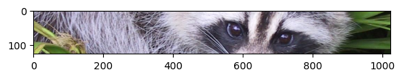

In [ ]:
plt.imshow(sliced_image_array)

We can similarly slice the array horizontally. Let's do both vertical and horizontal slicing. Notice that the vertical
slice information is the **first argument** to `[…]` and the horizontal slice information is the **second argument**,
because the *n*'th argument is applied to the *n*'th axis:

In [ ]:
sliced_image_array = image_array[250:375, 500:800]
plt.imshow(sliced_image_array)

**Task**: Modify the code below to display only the nose of the raccoon!

In [ ]:
plt.imshow(image_array[250:375, 500:800])

### Color channels

The third axis of these arrays has size 3. This axis represents the **color channel**. Cells in the first address of
this axis represent amounts of **red light**, cells in the second **green light**, and cells in the third **blue
light**. Different mixtures of these light amounts produce all the colors a computer screen can display.

For example, we can form the color **yellow** as an equal mix of **red** and **green** light. Here we demonstrate this
by creating a 1 × 1 × 3 array, representing an image containing a single pixel. We fill this array with equal amounts of
red and green light:

In [ ]:
def plot_color(r, g, b):
  return plt.imshow([[[r,g,b]]])
plot_color(255, 255, 0)

**Task**: Modify the call to `plot_color` below to produce a pink image:

In [ ]:
plot_color(255, 255, 0)

We will now copy our original image array, and modify it to change some of the pixel values. We're going to modify the
noise of the racoon to be blue. To do this, we'll *set* values of part of the array corresponding to the nose.

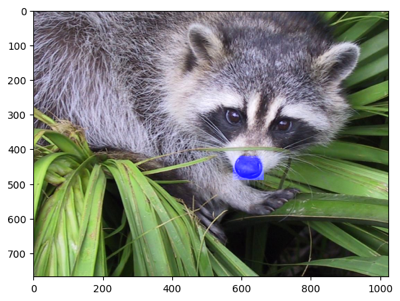

In [ ]:
clown_image_array = image_array.copy()
clown_image_array[420:490, 575:665, 2] = 255
plt.imshow(clown_image_array)

We changed a particular slice of the array, setting it to the maximum value. This slice corresponded to the red channel
of a rectangle of pixels around the raccoon's nose.

**Task**: It was recently discovered that the raccoon in this image was an important witness in a state investigation into illegal logging. For this reason, we need to protect the identity of the racoon by censoring its eyes. Modify the code below to replace the section around its eyes with a black rectangle.

<font color='gray'>Hint: to see *all* color channels to a value rather than just the blue channel, you can use `:` instead of `2`.</font>

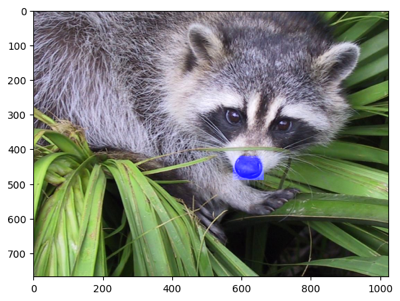

In [ ]:
witness_protection_array = image_array.copy()
witness_protection_array[420:490, 575:665, 2] = 255
plt.imshow(witness_protection_array)

### Tinting an image

We can modify the amounts of color in the racoon array by multiplying the color channels with a 1 × 1 × 3 array that
represents the factor with which to multiply each channel. Let's double the brightness of the blue channel, and keep the
other channels the same:

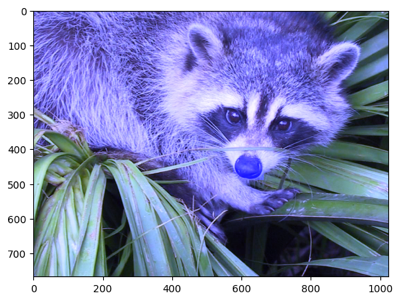

In [ ]:
plt.imshow(clown_image_array * np.array([[[1, 1, 2]]]))

We received a warning because the brightness values of the blue channel now exceeds 255, which is the maximum amount of
brightness that can be displayed. These >255 values will still be intepreted as 255 for plotting purposes. Notice also
that the color of the green leaves didn't change much, because they don't have much blue light in them to begin with!

**Task**: Modify the code below to multiply the **green** channel by a factor of 2 instead of the blue channel:

In [ ]:
plt.imshow(clown_image_array * np.array([[[1, 1, 2]]]))

### Grayscale images

We've seen that images with three color channels are **color** images, with the color channel corresponding to the $3^{\textrm{rd}}$
axis of the array. If an image array does not have a $3^{\textrm{rd}}$ axis, then we do not have color information, and we call this a
**grayscale** image.

Let's extract only the **green** color channel of our racoon using slice notation `[…]` to obtain a grayscale image:

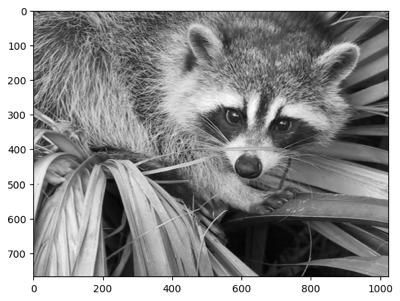

In [ ]:
def plot_grayscale(array):
  return plt.imshow(array, cmap='binary_r')
plot_grayscale(clown_image_array[:, :, 1])

The slice `[:, :, 1]` requested all rows  and all columns of the original array, but only the second (green) color
channel.

**Task**: Modify the code below to plot the **blue** color chanel of the original image as a grayscale image. You should see that the *leaves* are darker in the grayscale image derived from the blue color channel than the grayscale image derived from the green color channel, because of course leaves reflect mostly green light! The *nose* of the raccoon should appear bright white, since we set it's blue channel to have the maximum value earlier.

In [ ]:
plot_grayscale(clown_image_array[:, :, 2])

How do we obtain a single grayscale image that incorporates the brightness values from **all** three color channels,
rather than taking only one at a time?

To do this, we want to *total* amount of light at a given position in the image, irrespective of whether it is red,
green, or blue light. Therefore, we wish to *sum* over the third axis -- the color channel axis. Recall that axes, like
most things in Python, start counting at 0, so the third axis corresponds to `axis=2`.

In [ ]:
plot_grayscale(clown_image_array.sum(axis=2))

When taking photographs with old-fashioned cameras, it is important to know the total amount of light that is coming
into the camera's lens, so that we can set the **exposure** correctly.

We'll now do a similar thing with our image. We wish to find the average amount of light that is present in the image.
To do this, we wish wish to average over the horizontal **and** vertical **and** color channel axes. We'll use the
`mean` method to do this:

In [ ]:
image_array.mean(axis=(0,1,2))

110.16274388631184

**Task**: Modify the code below to calculuate the average amount of light in the **clownified** raccoon image. Before you evaluate the code, predict whether this mean value should be larger or smaller than the mean value above, and by roughly how much.

In [ ]:
image_array.mean(axis=(0,1,2))

We can also calculate the average **color** of an image. To do this, we will simply avoid summing over the color
channel, so that we get an average green, average blue, and average red amount of light that we can then interpret as an
average color. Run the code below:

In [ ]:
image_array.mean(axis=(0,1))

array([110.67604192, 117.72977066, 102.08241908])

**Task**: Modify the call to `plot_color` below to visualize the average color that you computed above. It should appear slightly green, because the image consists of mostly green leaves and a mostly black-and-white raccoon:

In [ ]:
plot_color(0, 0, 0)

# Slicing

In the previous section, we dealt with an color image array, which is an array with 3 *axes*, which we called a
**3-array**.

The first two axes were **spatial**: they represented the horizontal and vertical arrangement of pixels. The sizes of
these axes corresponded to the **number of pixels** in the horizontal and vertical directions of the image.

The third axis of an image array is quite different, since it represents **color**, with the size being 3 because there
are 3 color channels that, when mixed together, allow us to display most of the colors that are visible to humans.

In this section, we're going to be a little more explicit with slicing, and take you through the theory.

Let's play with a simple image that illustrates this. It will be a 5 × 4 color image that depicts a capital letter "F",
in pink on a black background. We show this below:

In [ ]:
f_array = np.array([
	[[0,0,0],[1,0,1],[1,0,1],[1,0,1]],
	[[0,0,0],[1,0,1],[0,0,0],[0,0,0]],
	[[0,0,0],[1,0,1],[1,0,1],[0,0,0]],
	[[0,0,0],[1,0,1],[0,0,0],[0,0,0]],
	[[0,0,0],[1,0,1],[0,0,0],[0,0,0]]
])
plt.imshow(f_array * 255)

The image array is a 5 × 4 × 3 array:

In [ ]:
f_array.shape

(5, 4, 3)

We can visualize this 3-array using a 3 dimensional "cube diagram", where each cube represents a cell of the image
array. Here we will draw the cube as **solid** if the value of cell is **1**, and as empty if the value of the cell is
**0**. We will also draw cells that live in the red color channel as red, cells in the green channel as green, etc.

Since pink is the color sum of red and blue, we will can that there are only two channels in which **1**s are present:

<center><img width="300" src="https://quivergeometry.net/indaba/0gd5mzhs5aqu7_1buqkk8864wrn_0600_0604.png"></center>

Notice that the shape of 3-array is 5 × 4 × 3, and the axes are therefore in the order: **rows**, **columns**,
**channels**.

## Specifying one axis

The first kind of slicing we will do is just to **specify** an index for a specific, single axis in the 3-array. This
will select all cells that have that index. The result will be a 2-array whose axes are the ones we did **not** specify.
Let's look at an example.

Let's specify the first axis, which is the **rows** axis. If we select the **first row** from the 5 × 4 × 3 sized
3-array, we obtain a 4 × 3 sized matrix whose axes correspond to the **columns** and **color channels**:

<center><img width="66" src="https://quivergeometry.net/indaba/02q9wbf4zlm2z_0ts22cg04od3s_0132_0034.png"></center>

<center><img width="350" src="https://quivergeometry.net/indaba/0z8a5j4bz6t5z_04g6c994hec97_0700_0694.png"></center>

We can perform this operation in **numpy** using by specifying the row we want in the first position of the slice
`[...]` notation, and specifying the other axes as `:`, which means *take all indices* in that axis. Here we are
selecting the first row, which is indexed as **0** in Python:

In [ ]:
f_array[0, :, :]

array([[0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

**Task**: Explain why the pattern of 0s and 1s in the above array corresponds to the slice shown in the cube diagram above.

Similarly, if we slice a particular **column** from this 3-array, we obtain a 4 × 3 matrix (aka 2-array) whose axes
correspond to the **rows** and **color channels**. Here we select the **third** column:

<center><img width="400" src="https://quivergeometry.net/indaba/0u2wptawfelio_0j7h8utls0xw0_0800_0682.png"></center>

In **numpy**, we are now selecting a particular index (specifically 2) in the column axis, which is the **second** axis.

In [ ]:
f_array[:, 2, :]

array([[1, 0, 1],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0]])

**Task**: Again, explain why the pattern of 0s and 1s in the above array corresponds to the slice shown in the cube diagram above.

If we slice a particular **channel** from this 3-array, we obtain a 3 × 3 matrix (aka 2-array) whose axes correspond to
**rows** and **columns**.

<center><img width="300" src="https://quivergeometry.net/indaba/19uv1fk75qrwn_0bf5xj5e4kjos_0600_0956.png"></center>

In **numpy**, we are now selecting a particular index (specifically 0) in the color channel axis, which is the **third**
axis.

In [ ]:
f_array[:, :, 0]

array([[0, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

**Task**: Modify the code below to obtain the matrix corresponding to the **green** color channel. Predict before you run the code what the output will be.

In [ ]:
f_array[:, :, 0]

## Specifying two axes

We can also produce a single **vector** (aka 1-array) by specifying both a particular **row** and a particular **color
channel**. This leaves only the **columns** axis unspecified, meaning the result has just this one axis, and is hence a
1-array.

<center><img width="350" src="https://quivergeometry.net/indaba/0ko31irtkn74m_0dwym9mnov0df_0700_0708.png"></center>

In **numpy**, we are specifying a value for the row ($1^{\textrm{st}}$ axis) **and** channel ($3^{\textrm{rd}}$ axis):

In [ ]:
f_array[0, :, 0]

array([0, 1, 1, 1])

**Task**: Modify the code below to obtain the vector corresponding to last **green** color channel for the **last** row of the image. Predict before you run the code what the output will be.

In [ ]:
f_array[0, :, 0]

There are **two** other combinations of axis we can slice: **row and column** (which leaves color channel unsliced), and
**column and color channel** (which leaves row unsliced). Let's examine slicing the row and column:

<center><img width="375" src="https://quivergeometry.net/indaba/13nroxkwczq6s_0jzg4gcercxx1_0750_0612.png"></center>

This corresponds to taking a single **pixel** from the image, since we are left only with color information.

In **numpy**, we are specifying a value for the row ($1^{\textrm{st}}$ axis) **and** column ($2^{\textrm{nd}}$ axis):

In [ ]:
f_array[2, 2, :]

array([1, 0, 1])

**Task**: Modify the code below to obtain the vector corresponding to colors for the bottom-right pixel of the image. Predict before you run the code what the output will be.

In [ ]:
f_array[2, 2, :]

## Specifying three axes

Lastly, we can specify all three axis. This corresponds to taking the value of a color channel for a single pixel. After
we specify *all* the axes, there are no axes left, and so we obtain a **scalar value**. This is effectively a
**0-array**, an array with no axes, and hence only one possible cell.

<center><img width="49" src="https://quivergeometry.net/indaba/19u6g7i18uixm_1a2wrnl0i13jh_0098_0136.png"></center>

<center><img width="350" src="https://quivergeometry.net/indaba/1lf5jzy5qt2w1_15c5kz45q2hxd_0700_0548.png"></center>

In **numpy**, we are specifying a value for the row ($1^{\textrm{st}}$ axis) **and** column ($2^{\textrm{nd}}$ axis) **and** channel ($3^{\textrm{rd}}$ axis):

In [ ]:
f_array[2, 2, 0]

1

**Task**: Modify the code below to obtain the value corresponding to the blue channel of the top, left pixel. Predict before you run the code what the output will be.

In [ ]:
f_array[2, 2, 0]

## Sub-arrays

As we saw earlier, we are not limited to specifying a **single** index for an axis. We can also specify a **range** of
indices. By doing this, we do **not** remove that axis from the result, since there are now multiple cells within that
range on that axis.

Let's take the $2^{\textrm{nd}}$ through $3^{\textrm{rd}}$ columns, and the $2^{\textrm{nd}}$ through 4th rows, but only take the first two colors channels (red and
green):

<center><img width="450" src="https://quivergeometry.net/indaba/1ht4q0886vqej_1t6gsdluuc8fd_0900_0672.png"></center>

In **numpy**, we achieve this using the notation `start:stop`. Note that the `start` is *inclusive*, but the stop is
*exclusive*, so `1:4` means taking indices `1,2,3`:

In [ ]:
f_array[1:4, 1:3, 0:2]

array([[[1, 0],
        [0, 0]],

       [[1, 0],
        [1, 0]],

       [[1, 0],
        [0, 0]]])

This array is a little hard to read, so we'll instead show **only** the red color channel, which makes the little shape
"T" above easier to see:

In [ ]:
f_array[1:4, 1:3, 0]

array([[1, 0],
       [1, 1],
       [1, 0]])

You might have noticed we've been using the syntax `:` to mean take the entire range from beginning to end -- if either
start of stop is left off, the meaning is to start / stop at the beginning / end of that axis.

**Task**: Predict the shape of the array that is produced by the code below. After you've done that, predict the values that will be produced. Then check your answer by running the code!

In [ ]:
f_array[1, 1:4, 2]

# Transposing

## Transposing the first two axes:

### Transposing a row vector to a column vector:

<center><img width="354" src="https://quivergeometry.net/indaba/1qaapl4y7j5e5_0l3651opjz6de_0708_0318.png"></center>

<center><img width="609" src="https://quivergeometry.net/indaba/1i4vn8wqz62c2_06ck0j956dqqt_1218_0338.png"></center>

### Transposing a matrix:

<center><img width="396" src="https://quivergeometry.net/indaba/1sszhs3swaq2f_180ecjngujepm_0792_0322.png"></center>

### TODO: put shape labels on all these, write text and exercises

<center><img width="500" src="https://quivergeometry.net/indaba/0b0vywgbvzuax_1ghpxedzcknt2_1000_0462.png"></center>

## Transposing the second and third axes

<center><img width="500" src="https://quivergeometry.net/indaba/1v8nqw03ga4pt_063do8t8l86jr_1000_0506.png"></center>

## Transposing as simply reordering axes:

<center><img width="500" src="https://quivergeometry.net/indaba/1c8bp2h83vdca_1tqm7hfdeqad3_1000_0462.png"></center>

# Combining arrays

### Elementwise operations

If we have multiple arrays of the same shape, it is possible to combine them as if they were numbers. For example, we
can add two arrays, or multiply them, or subtract them. The way we do this is very straightforward: we simply add the
*ordinary* numbers in the corresponding cells. This is called an **elementwise** operation, since it is matches
**elements** of each array with each-other.

We'll illustrate this with two vectors. We'll think of these as *column vectors*. All this means is that we are thinking
of the vector as being a **column** of numbers, meaning that each cell is in a different **row**. This *intepretation*
isn't part of numpy, or part of the code at all, but it is a helpful interpretation for us as humans, since it allows us
to draw the vector in two dimensions, in a **square diagram**:

<center><img width="173" src="https://quivergeometry.net/indaba/1l7j5uzulcdta_1pug12nieiq5q_0346_0386.png"></center>

Here is the **numpy** code that creates these two vectors, which we'll name `r` (for red) and `b` (for blue). Run this
code:

In [ ]:
r = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])
print(r.shape, b.shape)

Notice that both vectors have the same shape, which is a 1-tuple containing 4, since there is a single axis with 4 cells
in it.

We can **add** these two vectors by simply adding the numbers in the corresponding cells, as follows:

<center><img width="397" src="https://quivergeometry.net/indaba/0cnf8kf7eu0ai_1pludea9p7yj1_0794_0402.png"></center>

In [ ]:
r = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])
r + b

array([11, 22, 33, 44])

**Task**: Modify the code below to subtract 1/10 of the `b` vector from the `a` vector. What will you get?

In [ ]:
r + b

### Combining matrices

We can also combine two matrices. Let's again create an `rm` matrix and `bm` matrix corresponding to these:

<center><img width="255" src="https://quivergeometry.net/indaba/0psss2wwlcucq_1rmbusl1kb60j_0510_0310.png"></center>

In [ ]:
rm = np.array([[1, 2], [3, 4]])
bm = np.array([[1, 0], [0, 1]])
print(rm.shape, bm.shape)

Addition again works elementwise:

<center><img width="523" src="https://quivergeometry.net/indaba/02jhcfg17hfnt_0i39hq2yodgvr_1046_0332.png"></center>

**Task**: Modify the code below to add the `rm` matrix to the `bm` matrix:

In [ ]:
r + b

### Broadcasting

Interestingly, however, we can combine arrays that do *not* have exactly the same shape. This is easiest to explain
visually.

Here's the basic concept, which we will shortly explain:

<center><img width="638" src="https://quivergeometry.net/indaba/1nog4qt716b3z_1e61kkyzkzf8f_1276_0340.png"></center>

Notice the red matrix has both a **row** and **column** axis, but the blue vector only has a **row** axis. It is
*missing* a column axis. So how do we match up the cells of the two arrays? The solution is simple: we treat the blue
array as *unchanging* across these columns, so we can simply repeat the value it has in a given row -- these repeated
values as shown above in green.

In other words, we have made the following change when evaluating the sum:

<center><img width="333" src="https://quivergeometry.net/indaba/18vhb644s0jyg_0kvm7vhrhz9l7_0666_0316.png"></center>

This kind of operation, in which we *fill in* missing axes by simply repeating the values of cells, is know
**broadcasting**. Here's the broadcast operation depicted on its own, where we broadcast to create a new axis with size
3, turning the vector into a matrix:

But notice there is a *second* way we could broadcast a vector to form a matrix:

<center><img width="157" src="https://quivergeometry.net/indaba/0ns690nt6dled_0k6ptk5hwrg3l_0314_0594.png"></center>

If we use this second way, then the sum would come out differently:

<center><img width="333" src="https://quivergeometry.net/indaba/1wciuxcfbzqyk_1e9iqw3i5aesu_0666_0826.png"></center>

How are we to decide between these two possibilities, which we show again below?

<center><img width="428" src="https://quivergeometry.net/indaba/09hmve9842qtr_0eobtt5tqyx2v_0856_0912.png"></center>

The answer is that we have to *tell* numpy whether we want to consider a **vector** as a **column vector** or a **row
vector**. We do this by taking the 1-array, which has only 1 axis ("rows"), and inserting a *new* axis either before or
after the existing axis: There are two ways we can then do this:

<center><img width="405" src="https://quivergeometry.net/indaba/15objuhl4spw2_13hzn9wquaa5d_0810_0486.png"></center>

### TODO: examples of inserting one dimensions, and collapsing them with squeeze

### TODO: put "shape labels" into all diagrams, illustrate broadcasting as operating on shapes directly

### TODO: Assembling vectors into matrices

# Aggregating arrays

We've seen that **transposing** retains the number of axes and cells of an array, but re-orders them. The operation of
**slicing** *can* reduce the number of axes, depending on whether we select a single index (using a number like `1`) or
a subset of indices (using a range specification like `1:5`).

The next operation we'll consider is **aggregation**, which always reduces the number of axes.

### TODO: Add exercises for this!

Aggregation is the process of removing axes of an array by using an **aggregation function** that can turn multiple
values into a single value. A very common and useful example of an aggregation function is `sum`, which takes a list of
values and returns their sum. `sum` is built-in to Python:

In [ ]:
sum([1,2,3,4,5])

15

Another useful example is `max`, which gives the largest out of all the values in the list:

In [ ]:
max([1,2,3,4,5])

5

In general, all aggregation functions take a *collection* of inputs of some kind and produce a single output. But there
are different ways to apply an aggregation function to an array.

For example, let's take the following matrix:

<center><img width="193" src="https://quivergeometry.net/indaba/14wlmj37b375o_1ue0gp25zs13h_0386_0226.png"></center>

We could sum together *all* values of this matrix, producing a single number:

In [ ]:
matrix = np.array([[0, 1, 2, 3], [10, 11, 12, 13]])
matrix.sum()

52

Here we highlight all the cells that are summed together to produce this value:

<center><img width="294" src="https://quivergeometry.net/indaba/0uicqi8hktya8_10fjm687tbkoj_0588_0234.png"></center>

### Summing across rows

Alternatively, we could "sum across rows" -- this is the operation of summing the contents of each *column* of the
matrix. There are 4 columns so there will be 4 cells in the result of this summation:

In [ ]:
matrix.sum(axis=0)

array([10, 12, 14, 16])

Here is the diagram of this operation:

<center><img width="198" src="https://quivergeometry.net/indaba/1u5gqlg21p4sw_1qq64e3wh7tx4_0396_0632.png"></center>

An alternative way to think about this is that we are taking the elementwise **sum** of two **row vectors**. There are
two rows so we are summing two vectors, each of size 4:

<center><img width="194" src="https://quivergeometry.net/indaba/0j25s0atn056c_0eyafpaiihwyc_0388_0454.png"></center>

Notice that once we have "summed along rows" the **row** axis is *gone* from the result.

### Summing across columns

Secondly, we could "sum across columns" -- which sums together the contents of each *row* of the matrix. There are 2
rows so there will be 2 cells in the result:

In [ ]:
matrix.sum(axis=1)

array([ 6, 46])

Here is the diagram of this operation:

<center><img width="501" src="https://quivergeometry.net/indaba/17v5584ce5hu9_1s9yfzanj8f6b_1002_0250.png"></center>

Again, we can also see this as summing four column vectors elementwise:

<center><img width="360" src="https://quivergeometry.net/indaba/1xkd4cy5d0358_0cos5z7fo9df9_0720_0238.png"></center>

### Collecting and applying

How should we think about these operations in a way that generalizes to higher order arrays?

In each of these cases, we are forming **collections** of cells, then feeding each collection to the aggregation
function `sum`. The function `sum` is run once for each such collection, and produces a result that goes in a cell of
the new array.

This suggests a general way to conceptualize aggregation: an aggregation consists of **collect** step and an **apply**
step.

In the **collect** step, we form make a new array whose cells correspond to *collections* of cells from the original
array. This **collected** array will always have a shape with fewer axes than the original array -- those axes we
collect are now "within" each cell.

In this example, we collect *across* rows / *within* columns, so the resulting collected array doesn't have a **rows**
axis:

<center><img width="195" src="https://quivergeometry.net/indaba/1a7e6yjv7h7at_1ktufqg5g9jgv_0390_0490.png"></center>

In the **apply** step, we apply the chosen aggregation function (`sum`) to the collected values in each cell, and obtain
an array of the *same* shape:

<center><img width="193" src="https://quivergeometry.net/indaba/0g109wy90hpep_1fxqjfys5qw1d_0386_0386.png"></center>

Let's see this in action for the other two summations:

<center><img width="718" src="https://quivergeometry.net/indaba/0nf6zi9y3wvf0_1cwjxpzr1gl2q_1436_0508.png"></center>

Notice an important, although obvious, fact: we first sum rows and then columns, or first columns and then rows, we
still get the total *scalar* sum:

<center><img width="486" src="https://quivergeometry.net/indaba/19wdnnfx2l427_0x6lpwfipr8ip_0972_0900.png"></center>

We'll illustrate this fact by taking the original array, and summing its columns to produce a new array, and then
summing the rows of *that* array:

In [ ]:
summed = matrix.sum(axis=1)
print("first sum cols: ", summed)

summed = summed.sum(axis=0)
print("then sum rows: ", summed)

**Task**: modify the following code to do this sum the other way around: first summing the rows and *then* summing the columns of that result. Hint: the obvious change won't work. Why not?

In [ ]:
summed = matrix.sum(axis=0)
print("first sum rows: ", summed)

summed = summed.sum(axis=1)
print("then sum cols: ", summed)

TODO: Show sums of 3-arrays.

# Dot products

### Hadamard product between two vectors

<center><img width="300" src="https://quivergeometry.net/indaba/0gmpacrgyrwif_0jg1lqaviagyj_0600_0600.png"></center>

### Red and blue are multiplied to produce purple:

<center><img width="300" src="https://quivergeometry.net/indaba/1fap6ejwtewzq_1xj0uoowa23ha_0600_0602.png"></center>

### Sum over this dimension:

<center><img width="300" src="https://quivergeometry.net/indaba/0atidgszcypkt_1njjum28l9ztz_0600_0738.png"></center>

### TODO: Explain this is the inner product between two vectors.

### "Shared" product between two matrices:

<center><img width="300" src="https://quivergeometry.net/indaba/19d0c9own1fji_0hy07k2ke3pdn_0600_0696.png"></center>

<center><img width="300" src="https://quivergeometry.net/indaba/0i7zysbl90www_1ebirxhsebqc0_0600_0696.png"></center>

<center><img width="300" src="https://quivergeometry.net/indaba/00er217o1dgju_0tulkzwkvbnv6_0600_0598.png"></center>

<center><img width="300" src="https://quivergeometry.net/indaba/1pi7a5v8qcnj7_1g3upnlse5gxe_0600_0598.png"></center>